In [15]:
# Import dataset from pycaret repository
from pycaret.datasets import get_data
insurance = get_data('insurance')

# Initialize environment
from pycaret.regression import *
r1 = setup(insurance, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

# Train a linear regression model
lr = create_model('lr')

# save transformation pipeline and model 
save_model(lr, model_name = 'C:/Users/Divyanjali Soni/Desktop/patients hospitatlization charges/deployment_28042020')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3006.6910,2.074460e+07,4554.6241,0.8761,0.4140,0.3492
1,3587.2905,3.306436e+07,5750.1621,0.8078,0.4614,0.3514
2,3071.8184,2.396654e+07,4895.5636,0.6966,0.5545,0.3998
3,3269.1866,2.750165e+07,5244.2013,0.7704,0.5637,0.4897
4,3324.5176,2.909711e+07,5394.1734,0.7836,0.4743,0.3113
5,3197.6389,2.430932e+07,4930.4484,0.8436,0.3676,0.2827
6,2990.7570,2.609096e+07,5107.9314,0.8225,0.3928,0.3230
7,3502.0131,3.052124e+07,5524.6035,0.8322,0.6018,0.3125
8,3176.4020,2.279718e+07,4774.6389,0.8528,0.4002,0.3474
9,3312.7439,2.925621e+07,5408.9008,0.8116,0.5226,0.3801


Transformation Pipeline and Model Succesfully Saved


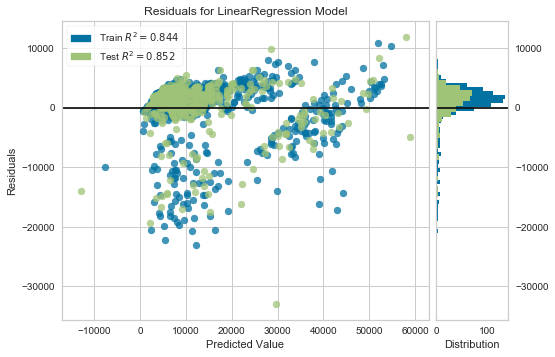

In [20]:
plot_model(lr)


In [17]:

deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [18]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [19]:

import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
